In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
class dataproc:
  """A simple class for ranking detectors by speed and occupancy"""
  def __init__(self,path):
    self.path = path
    self.n = 1
    self.days = [2,3]
    self.df = None

  def read_csv_format(self):
    self.df = pd.read_csv(self.path)
    self.df['datetime'] = pd.to_datetime(self.df['datetime'])

    return self.df

  def pick_random(self):
    # df is dataframe
    # n is the number of detectors to filter
    df = self.read_csv_format()
    unique_detectors = df['detector_id'].unique()
    select_detectors = random.sample(unique_detectors.tolist(),self.n)
    df_filter = df[df['detector_id'].isin(select_detectors)]
    return df_filter


  def visualize(self, df):
    return df['occupancy'].plot.hist(), df.plot(x='datetime',y='occupancy')

  def split_data(self,df):
    df['day'] = df['datetime'].dt.day
    df['hour']= df['datetime'].dt.hour
    df = df[(df['hour']>=6) & (df['hour']<=20) ]
    return df[df['day']==self.days[0]],df[df['day']==self.days[1]]


In [9]:
path = '/content/gdrive/MyDrive/CVENG-8160/MODULE 02/DATA/Copy of delay_bottleneck.csv'
dp = dataproc(path)

In [10]:
dp.read_csv_format()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat
0,MI064E009.1D,64,East,9.1,2017-09-01 02:09:00,62.000000,1.000000,1.000000,0.000,-90.704300,38.714100
1,MI064E009.1D,64,East,9.6,2017-09-01 02:09:00,61.285714,1.476190,1.238095,0.000,-90.704300,38.714100
2,MI064E009.1D,64,East,10.1,2017-09-01 02:09:00,61.214286,1.523810,1.261905,0.000,-90.704300,38.714100
3,MI064E009.1D,64,East,9.1,2017-09-01 02:44:00,59.250000,1.250000,1.000000,0.000,-90.704300,38.714100
4,MI064E009.1D,64,East,9.6,2017-09-01 02:44:00,63.833333,1.071429,1.000000,0.000,-90.704300,38.714100
...,...,...,...,...,...,...,...,...,...,...,...
894820,MR367S001.7D,367,South,2.5,2017-09-07 23:29:00,39.925926,1.296296,1.222222,0.083,-90.231247,38.819611
894821,MR367S001.7D,367,South,2.5,2017-09-07 23:34:00,40.355556,1.192593,1.170370,0.083,-90.231247,38.819611
894822,MR367S001.7D,367,South,2.5,2017-09-07 23:39:00,41.511111,1.392593,1.281481,0.083,-90.231247,38.819611
894823,MR367S001.7D,367,South,2.0,2017-09-07 23:59:00,56.000000,1.000000,1.000000,0.000,-90.231247,38.819611


In [12]:
#creating a detector ID map
detector_id_map = dict((x, i) for x, i in zip(dp.df['detector_id'].unique(), np.arange(1, (len(dp.df['detector_id'].unique()) + 1))))
print(detector_id_map)

{'MI064E009.1D': 1, 'MI064E009.8D': 2, 'MI064E011.2D': 3, 'MI064E012.8D': 4, 'MI064E013.6D': 5, 'MI064E015.2D': 6, 'MI064E016.3D': 7, 'MI064E017.0D': 8, 'MI064E018.1D': 9, 'MI064E018.9D': 10, 'MI064E021.9D': 11, 'MI064E023.2D': 12, 'MI064E024.2D': 13, 'MI064W010.0D': 14, 'MI064W011.1D': 15, 'MI064W012.8D': 16, 'MI064W013.6D': 17, 'MI064W015.1D': 18, 'MI064W015.9D': 19, 'MI064W017.0D': 20, 'MI064W017.9D': 21, 'MI064W018.4D': 22, 'MI064W018.9D': 23, 'MI064W020.2D': 24, 'MI064W021.9D': 25, 'MI064W009.2D': 26, 'MI070E204.0D': 27, 'MI070E204.9D': 28, 'MI070E206.0D': 29, 'MI070E208.5D': 30, 'MI070E209.6D': 31, 'MI070E210.0D': 32, 'MI070E212.2D': 33, 'MI070E212.9D': 34, 'MI070E215.2D': 35, 'MI070E216.3D': 36, 'MI070E217.1D': 37, 'MI070E218.2D': 38, 'MI070E219.1D': 39, 'MI070E220.5D': 40, 'MI070E221.4D': 41, 'MI070E222.2D': 42, 'MI070E222.6D': 43, 'MI070E223.9D': 44, 'MI070E227.2D': 45, 'MI070E230.7D': 46, 'MI070E231.9D': 47, 'MI070E232.7D': 48, 'MI070E233.8D': 49, 'MI070E234.3D': 50, 'MI070E2

In [23]:
df_group = dp.df.groupby('detector_id').size().reset_index(name='count')
df_group['index'] = df_group.index + 1
print(df_group)
print(df_group.to_dict()['detector_id'])

      detector_id  count  index
0    MI064E009.1D   5351      1
1    MI064E009.8D   5357      2
2    MI064E011.2D   5181      3
3    MI064E012.8D   5404      4
4    MI064E013.6D   5294      5
..            ...    ...    ...
189  MR367S000.5D   3469    190
190  MR367S001.0D   1794    191
191  MR367S001.4D   1770    192
192  MR367S001.7D   1761    193
193  MR367S002.6D   1761    194

[194 rows x 3 columns]
{0: 'MI064E009.1D', 1: 'MI064E009.8D', 2: 'MI064E011.2D', 3: 'MI064E012.8D', 4: 'MI064E013.6D', 5: 'MI064E015.2D', 6: 'MI064E016.3D', 7: 'MI064E017.0D', 8: 'MI064E018.1D', 9: 'MI064E018.9D', 10: 'MI064E021.9D', 11: 'MI064E023.2D', 12: 'MI064E024.2D', 13: 'MI064W009.2D', 14: 'MI064W010.0D', 15: 'MI064W011.1D', 16: 'MI064W012.8D', 17: 'MI064W013.6D', 18: 'MI064W015.1D', 19: 'MI064W015.9D', 20: 'MI064W017.0D', 21: 'MI064W017.9D', 22: 'MI064W018.4D', 23: 'MI064W018.9D', 24: 'MI064W020.2D', 25: 'MI064W021.9D', 26: 'MI070E204.0D', 27: 'MI070E204.9D', 28: 'MI070E206.0D', 29: 'MI070E208.5D', 3

In [ ]:
#lo0p through detector IDs and map them


In [ ]:
df = dp.pick_random()

In [ ]:
df.head()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat
816533,MI270S018.1D,270,South,20.1,2017-09-01 02:44:00,29.642857,1.0,1.0,0.083,-90.447403,38.716202
816534,MI270S018.1D,270,South,20.6,2017-09-01 02:44:00,27.678571,1.0,1.0,0.083,-90.447403,38.716202
816535,MI270S018.1D,270,South,21.1,2017-09-01 02:44:00,25.714286,1.0,1.0,0.083,-90.447403,38.716202
816536,MI270S018.1D,270,South,17.7,2017-09-01 02:49:00,39.383838,1.0,1.0,0.083,-90.447403,38.716202
816537,MI270S018.1D,270,South,18.2,2017-09-01 02:49:00,38.394737,1.0,1.0,0.083,-90.447403,38.716202


(<Axes: ylabel='Frequency'>, <Axes: xlabel='datetime'>)

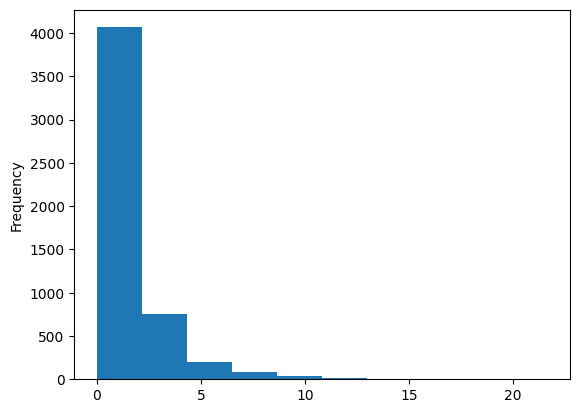

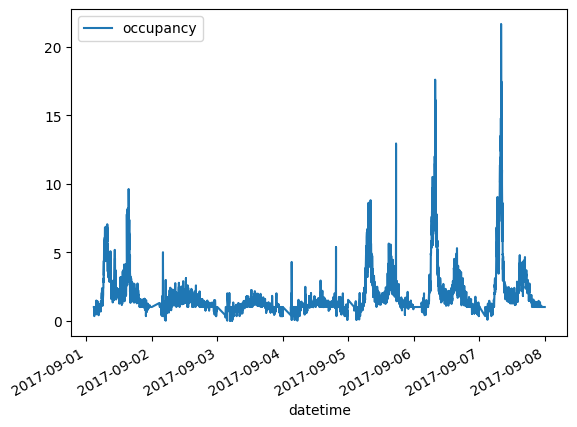

In [ ]:
dp.visualize(df)

## Stationarity

In [ ]:
[df1,df2] = dp.split_data(df)

In [ ]:
df1.head()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat,day,hour
817392,MI270S018.1D,270,South,18.2,2017-09-02 06:09:00,61.221053,1.210526,1.200000,0.0,-90.447403,38.716202,2,6
817393,MI270S018.1D,270,South,18.7,2017-09-02 06:09:00,63.326316,1.263158,1.200000,0.0,-90.447403,38.716202,2,6
817394,MI270S018.1D,270,South,19.2,2017-09-02 06:09:00,65.431579,1.315789,1.200000,0.0,-90.447403,38.716202,2,6
817395,MI270S018.1D,270,South,18.6,2017-09-02 06:44:00,62.737573,3.736842,2.408626,0.0,-90.447403,38.716202,2,6
817396,MI270S018.1D,270,South,19.1,2017-09-02 06:44:00,62.697368,3.473684,2.039474,0.0,-90.447403,38.716202,2,6


In [ ]:
df2.head()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat,day,hour
818132,MI270S018.1D,270,South,17.1,2017-09-03 06:09:00,74.666667,1.000000,0.333333,0.0,-90.447403,38.716202,3,6
818133,MI270S018.1D,270,South,17.6,2017-09-03 06:09:00,65.333333,1.000000,0.666667,0.0,-90.447403,38.716202,3,6
818134,MI270S018.1D,270,South,18.1,2017-09-03 06:09:00,56.000000,1.000000,1.000000,0.0,-90.447403,38.716202,3,6
818135,MI270S018.1D,270,South,17.1,2017-09-03 06:44:00,83.063492,1.682540,0.809524,0.0,-90.447403,38.716202,3,6
818136,MI270S018.1D,270,South,17.6,2017-09-03 06:44:00,76.698413,1.507937,0.904762,0.0,-90.447403,38.716202,3,6


<Axes: ylabel='Frequency'>

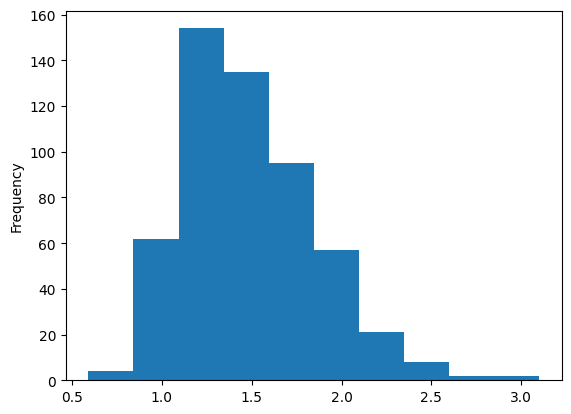

In [ ]:
df1['occupancy'].plot.hist()

<Axes: ylabel='Frequency'>

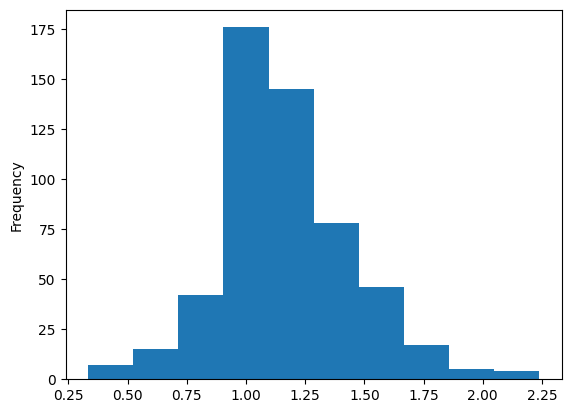

In [ ]:
df2['occupancy'].plot.hist()

In [ ]:
print ('means of both datasets')
print (df1['occupancy'].mean(),df2['occupancy'].mean())
print ('\nvariance between both datasets')
print (df1['occupancy'].var(),df2['occupancy'].var())

means of both datasets
1.491869548309607 1.166447219010425

variance between both datasets
0.13859183636651978 0.07909858564072242


##Use Dicker fuller test to test for significance

---



In [ ]:
def cor_coeff(df1, df2,column):
  mu1,std1 = df1[column].values.mean(), df1[column].values.std()
  mu2, std2 = df2[column].values.mean(), df2[column].values.std()

  xcor,ycor = (df1[column]-mu1).values, (df2[column]-mu2).values
  if not (len(xcor) == len(ycor)):
    xcor = np.resize(xcor,ycor.shape)

  x_comp = np.divide(xcor,std1)
  y_comp = np.divide(ycor,std2)

  numerator = np.sum(np.multiply(xcor,ycor))
  denominator = np.sqrt((np.sum(xcor**2)*np.sum(ycor**2)))
  coeff = numerator/denominator

  return xcor, ycor, coeff


In [ ]:
xcor, ycor, coeff = cor_coeff(df1, df2, 'volume')
print (coeff)

0.33870619644703914


In [ ]:
print (np.corrcoef(xcor,ycor))

[[1.        0.3387254]
 [0.3387254 1.       ]]


In [ ]:
def cor_coeff_array(x, y):
  mu1,std1 = np.mean(x), np.std(x)
  mu2, std2 = np.mean(y), np.std(y)

  xcor,ycor = x-mu1, y-mu2
  if not (len(xcor) == len(ycor)):
    xcor = np.resize(xcor,ycor.shape)

  x_comp = np.divide(xcor,std1)
  y_comp = np.divide(ycor,std2)

  numerator = np.sum(np.multiply(xcor,ycor))
  denominator = np.sqrt((np.sum(xcor**2)*np.sum(ycor**2)))
  coeff = numerator/denominator

  return coeff

In [ ]:
# x_data = volume[0:105]
# y_data = volume[5:107]
# print (cor_coeff_array(x_data, y_data))

In [ ]:
window = 2
lag = 1
data_len = 300; # check 50 through 500
volume = df1['volume'].values; # check for occupancy and speed
corrs = []
for data_range in range(0,len(volume)-(data_len+lag),window):
  x_data = volume[0:data_range+data_len]
  y_data = volume[data_range+lag:data_range+data_len+lag]
  corrs.append(cor_coeff_array(x_data, y_data))

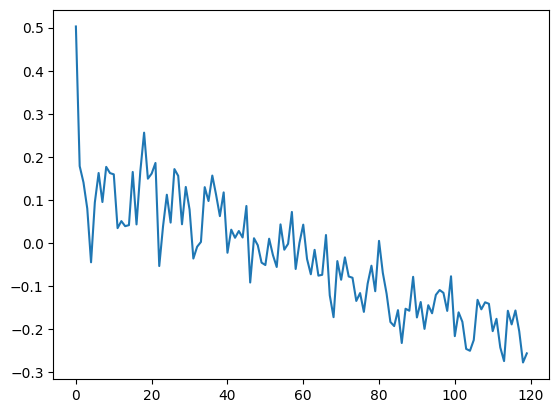

In [ ]:
plt.plot(corrs)

In [ ]:
print (corrs)

[0.8602392948302238, 0.7852562977359507, 0.7705745210143645, 0.7629760509363919, 0.7657991505560574, 0.7539626015693291, 0.7440480273596679, 0.7500309664654832, 0.7157785526441408, 0.6958215407030215, 0.6983367321455405, 0.6764295444843357, 0.6697309287796569, 0.6714973515188318, 0.6564169538152552, 0.6814333836813709, 0.6326505014938208, 0.6244461432907925, 0.602087457855612, 0.590949298644916, 0.6201201947709354, 0.5776216473699066, 0.5634793870723199, 0.5520816312491009, 0.5435616687552841, 0.5192289485801387, 0.46309033662046944, 0.4822791270551988, 0.46102351212036907, 0.41987780711529243]


## Note! you can stationarize and non-stationary data

In [ ]:
# write a function for calculating the 5-point, moving/median average of the traffic volume column

540


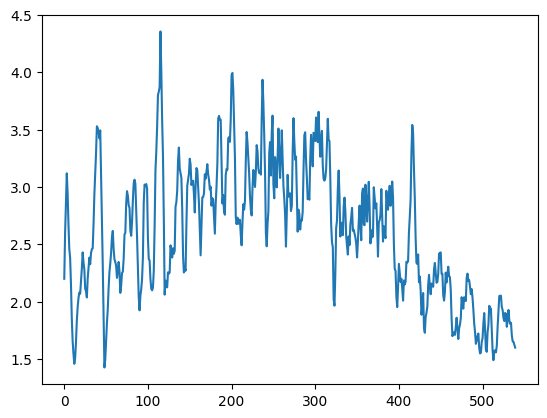

In [ ]:
# 5 point moving average
import matplotlib.pyplot as plt

window = 5
lag = 1
data_len = 300; # check 50 through 500
volume = df1['volume'].values;
print(len(volume))
avgs = []
for data_range in range(0,len(volume)):
  x_data = volume[data_range:data_range+window]
  avg = np.mean(x_data)
  avgs.append(avg)
plt.plot(avgs)
plt.show()